<center>
<img src="logo.png" height="900"> 
</center>


#  Гипотеза о равенстве средних

В этом задании мы попробуем сравнить между собой мощность двух процедур для проверки гипотезы о равенстве средних. __Это задание не является обязательным. Его можно не решать.__ 

-----------

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')
%matplotlib inline

Поговорим про мощность различных процедур. Мы с вами обсудили, что гипотезу о равенстве средних можно проверить с помощью следующей процедуры. 

### Процедура 1:

1. Собираем выборки $X_1, \ldots, X_n$ и $Y_1, \ldots, Y_n$;
2. Находим значение статистики

$$
z_{obs} = \frac{\bar x - \bar y}{\sqrt{\frac{s_x^2}{n_x} + \frac{s_y^2}{n_y}}};
$$

3. Говорим, что по ЦПТ $z_{obs} \overset{asy}{\sim} N(0,1);$
4. Находим критическое значение $z_{1 - \frac{\alpha}{2}}$;
5. Если мы видим, что $|z_{obs}| <  z_{1 - \frac{\alpha}{2}}$, мы говорим, что гипотеза не отвергается. 



Ту же саму гипотезу можно попробовать проверить с помощью другого алгоритма, основанного на доверительных интервалах.

### Процедура 2: 

1. Собираем выборки $X_1, \ldots, X_n$ и $Y_1, \ldots, Y_n$;
2. Находим $\bar x$ и $\bar y$;
3. Пользуясь ЦПТ и зная, что $\bar x \overset{asy}{\sim} N \left(\mu_1,\frac{s^2_x}{n_x} \right)$ и $\bar y \overset{asy}{\sim} N\left(\mu_2,\frac{s^2_y}{n_y}\right)$ строим для $\mu_1$ и $\mu_2$ доверительные интервалы;
4. Если доверительные интервалы пересеклись, говорим, что гипотеза не отвергается. 


Вроде бы вторая процедура выглядит довольно естественно, однако ей никто не пользуется. Дело в том, что для одинаковых ошибок первого рода, $\alpha$, ошибка второго рода, $\beta$, для процедуры, основанной на доверительных интервалах, окажется выше. Задание состоит в том, чтобы это увидеть.

> Для простоты будем дальше предполагать, что $\bar x > \bar y$. Также будем считать, что обе дисперсии известны и равны единице, $\sigma^2_x = \sigma^2_y = 1$. Объёмы выборок одинаковы, $n_x = n_y = n$. Альтернатива односторонняя, то есть наблюдаемое значение статистики нужно искать как $z_{1 - \alpha}$. 

__[а]__  Найдите мощность первой процедуры (единица минус ошибка второго рода). Запишите её через функцию распределения стандартной нормальной величины $\Phi(x)$. Вбейте её в заглушку ниже.

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

def power_1(n_obs, alpha=0.05, mu1=4, mu2=5, sigma=1):
    
    z_crit = stats.norm.ppf(1-alpha)
    se0 = np.sqrt(2*sigma**2/n_obs)
    
    return 1 - stats.norm.cdf(z_crit + (mu1-mu2)/(se0))


# your code here


In [6]:
power_1(100), power_1(10)

(0.9999999712190598, 0.7228115956892016)

In [7]:
# Ура ура ура все тесты открыты :) 
assert np.abs(power_1(100) - 0.99999) < 1e-4
assert np.abs(power_1(10) - 0.72281) < 1e-4

__[б]__ Выпишите доверительный интервал для $\bar x$ и для $\bar y$.  Правая граница интервала для $\bar x$ должна оказаться правее левой границы для $\bar y$. В таком случае гипотеза не отвергается. 

- Выпишите это неравенство. 
- Выразите из него значение $z_{1 - \frac{\alpha}{2}}$.
- Сравните получившуюся статистку со статистикой из первого пункта. 
- Найдите для неё мощность, запишите её через функцию распределения стандартной нормальной величины, $\Phi(x)$.

In [22]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

def power_2(n_obs, alpha=0.05, mu1=4, mu2=5, sigma=1):

    z_crit = stats.norm.ppf(1-alpha)
    se0 = np.sqrt(2*sigma**2/n_obs)
    
    return 1 - stats.norm.cdf(np.sqrt(2)*z_crit + (mu1-mu2)/(se0))


# your code here


In [23]:
power_2(100), power_2(10)

(0.9999989569196976, 0.46410135959425114)

In [24]:
# Ура ура ура все тесты открыты :) 
assert np.abs(power_2(100) - 0.9999) < 1e-4
assert np.abs(power_2(10) - 0.46410) < 1e-4

__[в]__  Постройте для получившихся функций графики, сравните их между собой. 


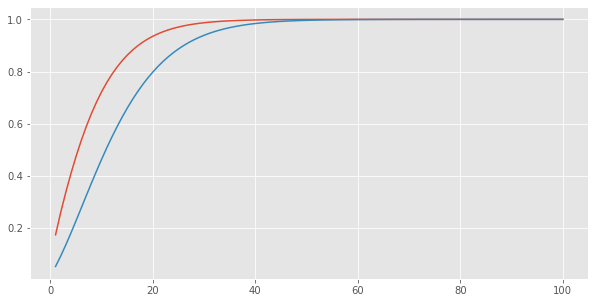

In [26]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
x = np.arange(1, 101, 1)
plt.figure(figsize=(10, 5))
plt.plot(x, power_1(x))
plt.plot(x, power_2(x))